There is an m x n rectangular island that borders both the Pacific Ocean and Atlantic Ocean. The Pacific Ocean touches the island's left and top edges, and the Atlantic Ocean touches the island's right and bottom edges.

The island is partitioned into a grid of square cells. You are given an m x n integer matrix heights where heights[r][c] represents the height above sea level of the cell at coordinate (r, c).

The island receives a lot of rain, and the rain water can flow to neighboring cells directly north, south, east, and west if the neighboring cell's height is less than or equal to the current cell's height. Water can flow from any cell adjacent to an ocean into the ocean.

Return a 2D list of grid coordinates result where result[i] = [ri, ci] denotes that rain water can flow from cell (ri, ci) to both the Pacific and Atlantic oceans.

 

Example 1:

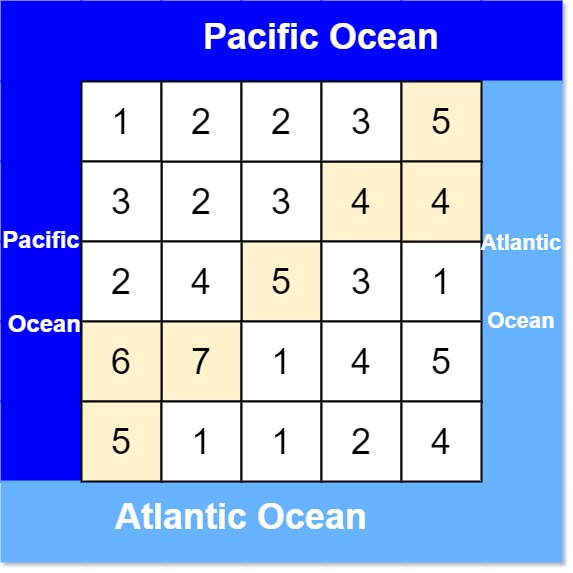

Input: heights = [[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]]
Output: [[0,4],[1,3],[1,4],[2,2],[3,0],[3,1],[4,0]]
Explanation: The following cells can flow to the Pacific and Atlantic oceans, as shown below:
[0,4]: [0,4] -> Pacific Ocean 
       [0,4] -> Atlantic Ocean
[1,3]: [1,3] -> [0,3] -> Pacific Ocean 
       [1,3] -> [1,4] -> Atlantic Ocean
[1,4]: [1,4] -> [1,3] -> [0,3] -> Pacific Ocean 
       [1,4] -> Atlantic Ocean
[2,2]: [2,2] -> [1,2] -> [0,2] -> Pacific Ocean 
       [2,2] -> [2,3] -> [2,4] -> Atlantic Ocean
[3,0]: [3,0] -> Pacific Ocean 
       [3,0] -> [4,0] -> Atlantic Ocean
[3,1]: [3,1] -> [3,0] -> Pacific Ocean 
       [3,1] -> [4,1] -> Atlantic Ocean
[4,0]: [4,0] -> Pacific Ocean 
       [4,0] -> Atlantic Ocean
Note that there are other possible paths for these cells to flow to the Pacific and Atlantic oceans.

Example 2:

Input: heights = [[1]]
Output: [[0,0]]
Explanation: The water can flow from the only cell to the Pacific and Atlantic oceans.

 

Constraints:

    m == heights.length
    n == heights[r].length
    1 <= m, n <= 200
    0 <= heights[r][c] <= 105



In [22]:
from typing import List

class Solution:
    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        m = len(heights)
        n = len(heights[0])
        if m == n == 1:
            return [[0, 0]]
        
        flow = [['' for _ in heights[0]] for _ in heights]
        
        def dfs(i, j, track):
            if flow[i][j] != '':
                return flow[i][j]
            flows = set()
            
            if i - 1 >= 0:
                if heights[i - 1][j] <= heights[i][j] and [i - 1, j] not in track:
                    flows.add(dfs(i - 1, j, track + [[i - 1, j]]))
            else:
                flows.add('p')
            if i + 1 < m:
                if heights[i + 1][j] <= heights[i][j] and [i + 1, j] not in track:
                    flows.add(dfs(i + 1, j, track + [[i + 1, j]]))
            else:
                flows.add('a')
            if j - 1 >= 0:
                if heights[i][j - 1] <= heights[i][j] and [i, j - 1] not in track:
                    flows.add(dfs(i, j - 1, track + [[i, j - 1]]))
            else:
                flows.add('p')
            if j + 1 < n:
                if heights[i][j + 1] <= heights[i][j] and [i, j + 1] not in track:
                    flows.add(dfs(i, j + 1, track + [[i, j + 1]]))
            else: 
                flows.add('a')
            
            if ('a' in flows and 'p' in flows) or 'b' in flows:
                flow[i][j] = 'b'
                return 'b'
            if 'a' in flows:
                flow[i][j] = 'a'
                return 'a'
            if 'p' in flows:
                flow[i][j] = 'p'
                return 'p'
            flow[i][j] = 'n'
            return 'n'
        
        for i in range(m)[::-1]:
            for j in range(n):
                dfs(i, j, [])
                
        ans = []
        for i in range(m):
            for j in range(n):
                if flow[i][j] == 'b':
                    ans.append([i, j])
        return ans

In [25]:
class Solution:

    MOVES = [(-1, 0), (0, -1), (1, 0), (0, 1)]

    def pacificAtlantic(self, heights: List[List[int]]) -> List[List[int]]:
        def dfs(i: int, j: int, visited: set):
            visited.add((i, j))
            for di, dj in self.MOVES:
                x, y = i + di, j + dj
                if 0 <= x < n and 0 <= y < m and (x, y) not in visited and heights[i][j] <= heights[x][y]:
                    dfs(x, y, visited)

        n, m = len(heights), len(heights[0])

        atl_visited = set()
        pas_visited = set()

        for i in range(n):
            dfs(i,     0, atl_visited)
            dfs(i, m - 1, pas_visited)

        for j in range(m):
            dfs(    0, j, atl_visited)
            dfs(n - 1, j, pas_visited)

        return atl_visited & pas_visited

In [26]:
s = Solution()
s.pacificAtlantic([[1,2,2,3,5],[3,2,3,4,4],[2,4,5,3,1],[6,7,1,4,5],[5,1,1,2,4]])

{(0, 4), (1, 3), (1, 4), (2, 2), (3, 0), (3, 1), (4, 0)}

In [27]:
s.pacificAtlantic([[1, 1], [1, 1]])

{(0, 0), (0, 1), (1, 0), (1, 1)}